In [13]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

In [14]:
I = -3
w = 0.05

s = np.arange(-10, 10, 0.2) # total input to the neuron nA

def activation(s):
    '''This function returns the activation of a neuron given
    the total input to the neuron, s.'''
    return 60 * (1 + np.tanh(s))

## 1.1 Plot the activation funciton of the neuron

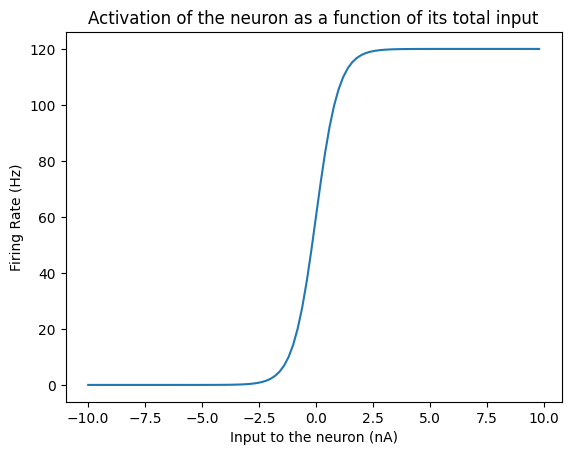

In [15]:
plt.plot(s, activation(s))
plt.xlabel('Input to the neuron (nA)')
plt.ylabel('Firing Rate (Hz)')
plt.title(r'Activation of the neuron as a function of its total input')
plt.savefig('simple_activation.png')

## 1.2 Study the Dynamics:

Simulate the system using dt = 0.1. Focus on the cases in which the initial condisitons are r(0) = 59; 60; 61. What is happening and why?

V(t + dt) = V(t) + (dV(t)/dt) * dt

In [16]:
def firing_rate(r_array, w, I, dt=0.1, time=100):
    '''This function returns the firing rate of a neuron given
    an array of total inputs to the neuron, an array of initial conditions, 
    a connection weight, some constant background current, and a time length.
    It's timestep = 0.1 ms by default. 
    The simulation runs for 100 ms by default.'''
    dt = dt

    r = np.zeros(time)

    avg_spikes_per_second = np.array([]).reshape(0, len(r))

    
    for i in range(len(r_array)):
        r[0] = r_array[i]
        for i in range(1, len(r)):
            r[i] = r[i-1] + (-r[i-1] + activation(w * r[i-1] + I)) * dt
        
        avg_spikes_per_second = np.vstack((avg_spikes_per_second, r))

    return avg_spikes_per_second

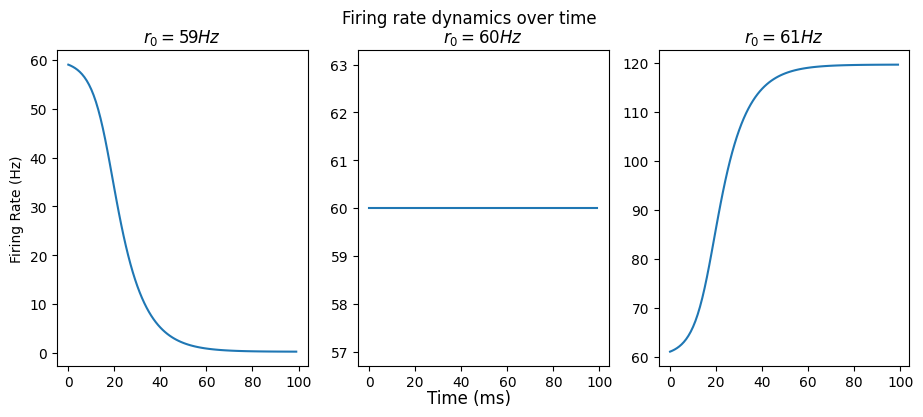

In [17]:
rs = [59, 60, 61]

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(11, 4.1)
fig.suptitle('Firing rate dynamics over time')
fig.supxlabel('Time (ms)')

ax1.plot(firing_rate(rs, w, I)[0])
ax1.set_title(r'$r_0 = 59Hz$')
ax1.set_ylabel('Firing Rate (Hz)')
ax2.plot(firing_rate(rs, w, I)[1])
ax2.set_title(r'$r_0 = 60Hz$')
ax3.plot(firing_rate(rs, w, I)[2])
ax3.set_title(r'$r_0 = 61Hz$')

fig.savefig('firing_rate_dynamics.png')

## 1.3 Add white noise and simulate the system with the same 3 initial conditions.

start with sigma = 0.1 and increase

In [18]:
def noisy_firing_rate(r_array, w, I, sigma, dt=0.1, time=100):
    '''This function returns the firing rate of a neuron given
    an array of total inputs to the neuron, an array of initial conditions, 
    a connection weight, some constant background current, a time length,
    and a noise value.
    It's timestep = 0.1 ms by default. 
    The simulation runs for 100 ms by default.'''
    dt = dt

    rates = np.zeros(time)

    avg_spikes_per_second = np.array([]).reshape(0, len(rates))
    
    for i in range(len(r_array)):
        rates[0] = r_array[i]
        for j in range(1, len(rates)):
            rates[j] = rates[j-1] + (-rates[j-1] + (activation(w * rates[j-1] + I) + (sigma * np.random.normal()))) * dt
        
        avg_spikes_per_second = np.vstack((avg_spikes_per_second, rates))

    return avg_spikes_per_second


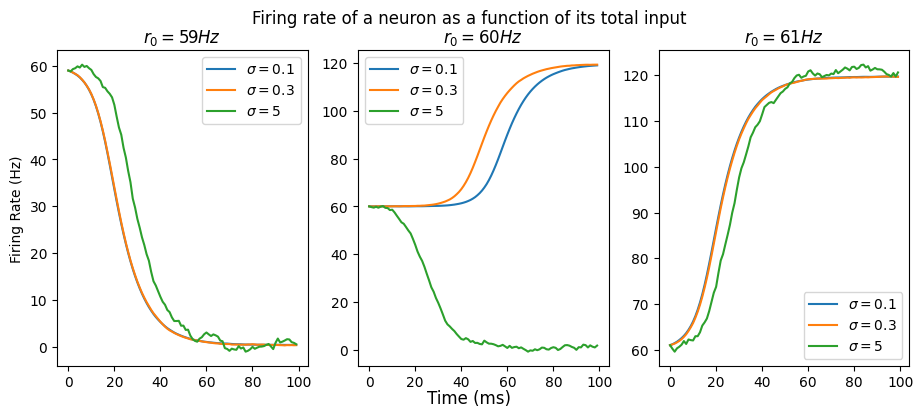

In [19]:

sigma_low = 0.1
sigma_med = 0.3
sigma_high = 5

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(11, 4.1)
fig.suptitle('Firing rate of a neuron as a function of its total input')

ax1.plot(noisy_firing_rate(rs, w, I, sigma_low)[0], label = r'$\sigma = 0.1$')
ax1.plot(noisy_firing_rate(rs, w, I, sigma_med)[0], label = r'$\sigma = 0.3$')
ax1.plot(noisy_firing_rate(rs, w, I, sigma_high)[0], label = r'$\sigma = 5$')
ax1.legend()
ax1.set_title(r'$r_0 = 59Hz$')
ax1.set_ylabel('Firing Rate (Hz)')

ax2.plot(noisy_firing_rate(rs, w, I, sigma_low)[1], label = r'$\sigma = 0.1$')
ax2.plot(noisy_firing_rate(rs, w, I, sigma_med)[1], label = r'$\sigma = 0.3$')
ax2.plot(noisy_firing_rate(rs, w, I, sigma_high)[1], label = r'$\sigma = 5$')
ax2.legend()    
ax2.set_title(r'$r_0 = 60Hz$')


ax3.plot(noisy_firing_rate(rs, w, I, sigma_low)[2], label = r'$\sigma = 0.1$')
ax3.plot(noisy_firing_rate(rs, w, I, sigma_med)[2], label = r'$\sigma = 0.3$')
ax3.plot(noisy_firing_rate(rs, w, I, sigma_high)[2], label = r'$\sigma = 5$')
ax3.legend()
ax3.set_title(r'$r_0 = 61Hz$')

fig.supxlabel('Time (ms)')

fig.savefig('noisy_firing_rate.png')





## 1.4 Study the flux

Plot the derivatives dr/dt as a funcition of the neuron's firing rate r. Find the zero-crossings of this plot and explain the meaning

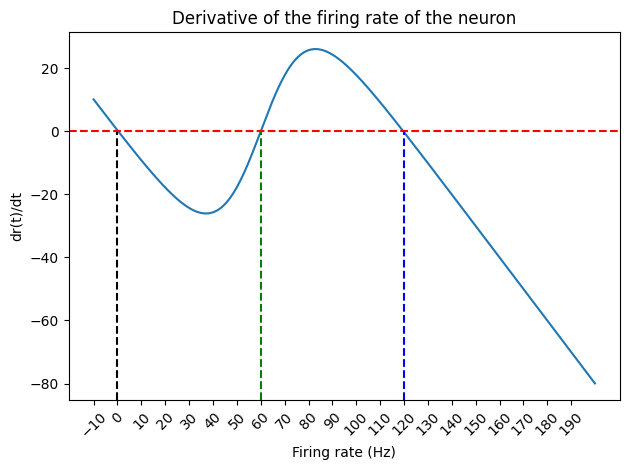

In [8]:
# derivatives plot:

r_vals = np.arange(-10, 200, 0.05)

def derivatives(r_vals, w, I):
    '''This function returns the derivative of the firing rate of a neuron
    given an array of total inputs to the neuron, a connection weight, and
    a constant background current.'''
    return -r_vals + activation((w * r_vals) + I)

plt.plot(r_vals, derivatives(r_vals, w, I))
plt.xticks(np.arange(-10, 200, 10), rotation=45)
plt.axhline(0, color='r', linestyle='--')
plt.axvline(0,color='black', linestyle='--', ymax=0.73)
plt.axvline(60, color='g', linestyle='--', ymax=0.73)
plt.axvline(120, color='b', linestyle='--', ymax=0.73)
plt.xlabel('Firing rate (Hz)')
plt.ylabel(r'dr(t)/dt')
plt.title('Derivative of the firing rate of the neuron')
plt.tight_layout()

plt.savefig('derivatives.png')

## 1.5 Bifurcation Diagram

create a plot to visualize how the number of solutions (zero corssings of the previous exercise) changes with diff. values of synaptic strength (w) and external input (I). 

set w to vary from 0 to 1 with increments of 0.01.

set I to vary from -5 to 0 with increments of 0.05

Generate a 100 by 100 empty matrix.

In [9]:
ws = np.arange(0, 1, 0.01)

Is = np.arange(-5, 0, 0.05)

m = np.array([np.empty([100,100])]).reshape(100, 100)

In [10]:
for i in range(len(ws)):
    for j in range(len(Is)):
        
        m[i][j] = (np.diff(np.sign(derivatives(r_vals, ws[i], Is[j]))) != 0).sum()

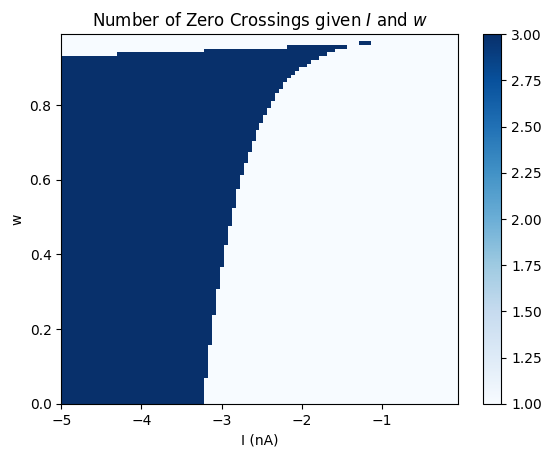

In [11]:
plt.imshow(m, extent=[Is[0], Is[-1], ws[0], ws[-1]], aspect='auto', cmap='Blues')
plt.colorbar()
plt.xlabel('I (nA)')
plt.ylabel('w')
plt.title(r'Number of Zero Crossings given $I$ and $w$')
plt.savefig('zero_crossings.png')

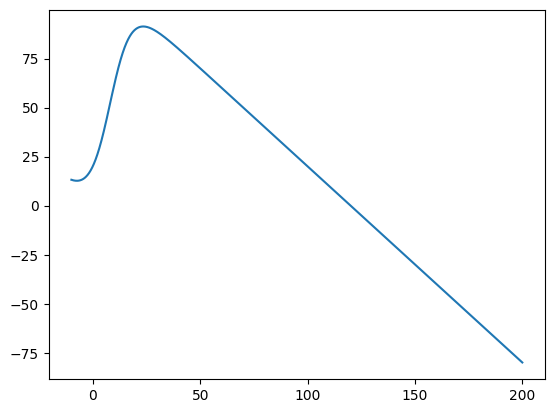

In [12]:
#Sanity check for the number of solutions
plt.plot(r_vals, derivatives(r_vals, 0.1, -0.8))